# Crime in the City of San Diego 
### Elisabeth Jones 

Intro:
I work at SANDAG (The San Diego Association of Governments) within their crimimal justice department. We are always looking for unique ways to analyze and visualize our data. For this project I decided to use python to build a animated bar chart tracking crime from 1950-2018 in the city of San Diego. 

First I import packages and read in my data file. Make sure to update the directory for your device.
df is the data for the animated bar chart
df2 is the data for the time series analysis visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

df = pd.read_excel('/Users/elisabethjones/Desktop/Fall_2019/Python/finalprojcrime/dataformatinital_1.xlsx') 
df2 = pd.read_excel('/Users/elisabethjones/Desktop/Fall_2019/Python/finalprojcrime/data.xlsx') 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/elisabethjones/Desktop/Fall_2019/Python/finalprojcrime/dataformatinital_1.xlsx'

## Animated Bar Chat

This is what my data looks like:

In [6]:
df

Year         Category  Rate
0    2018          Murder     35
1    2018            Rape    605
2    2018         Robbery   1439
3    2018   Aggr. Assault   3281
4    2018   Violent Crime   5360
..    ...              ...   ...
616  1950   Violent Crime    159
617  1950        Burglary    790
618  1950         Larceny   3603
619  1950   Vehicle Theft    774
620  1950  Property Crime   5167

[621 rows x 3 columns]

Sorting and organizing the data to be able to separate by year:

In [7]:
current_year = 1995
dff = (df[df['Year'].eq(current_year)]
       .sort_values(by='Rate', ascending=True)
       .head(9))
dff

Year         Category   Rate
207  1995          Murder      91
208  1995            Rape     346
209  1995         Robbery    3244
210  1995   Aggr. Assault    7396
212  1995        Burglary   10311
211  1995   Violent Crime   11077
214  1995   Vehicle Theft   12342
213  1995         Larceny   30505
215  1995  Property Crime   53158

Assigning colors for bars using a dictionary: 

In [8]:
colors = dict(zip(['Murder ', 'Rape ', 'Robbery ', 'Aggr. Assault ',
     'Burglary ', 'Violent Crime ', 'Vehicle Theft ', 'Larceny ', 'Property Crime '],
    ['paleturquoise', 'darkgrey', 'lightcoral', 'teal',
     'steelblue', 'lightpink', 'royalblue', 'firebrick', 'khaki']))

Creating the bar chart, and polishing the styles: 

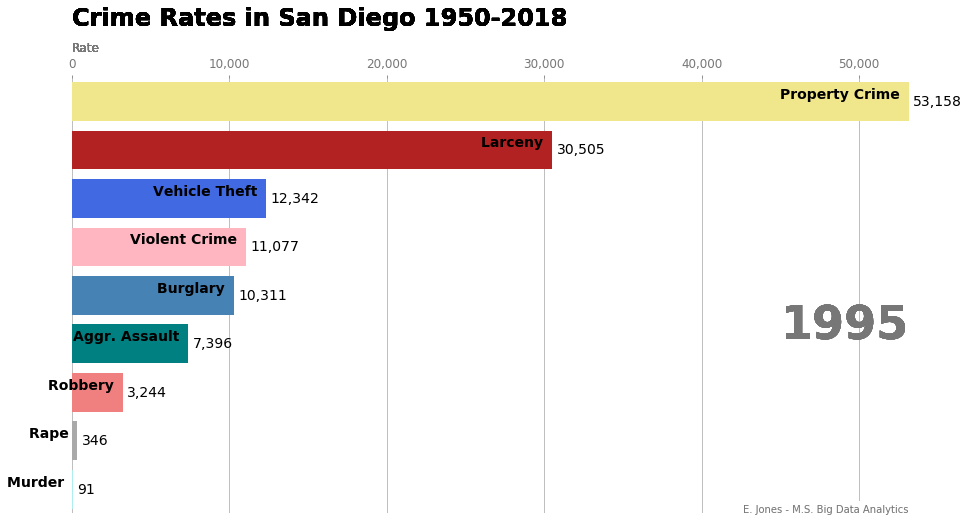

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Rate', ascending=True).tail(9)
    ax.clear()
    ax.barh(dff['Category'], dff['Rate'], color=[colors[x] for x in dff['Category']])
    dx = dff['Rate'].max() / 200
    for i, (Rate, Category) in enumerate(zip(dff['Rate'], dff['Category'])):
        ax.text(Rate-dx, i, Category, size=14, weight=600, ha='right', va='bottom')
        ax.text(Rate+dx, i, f'{Rate:,.0f}', size=14, ha='left', va='center')
        ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
        ax.text(0, 1.06, 'Rate', transform=ax.transAxes, size=12, color='#777777')
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', colors='#777777', labelsize=12)
        ax.set_yticks([])
        ax.margins(0, 0.01)
        ax.grid(which='major', axis='x', linestyle='-')
        ax.set_axisbelow(True)
        ax.text(0, 1.12, 'Crime Rates in San Diego 1950-2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
        ax.text(1, 0, 'E. Jones - M.S. Big Data Analytics', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(1995)

Creating the Animation using matplotlib.animation (once code is run you should just have to click play!):

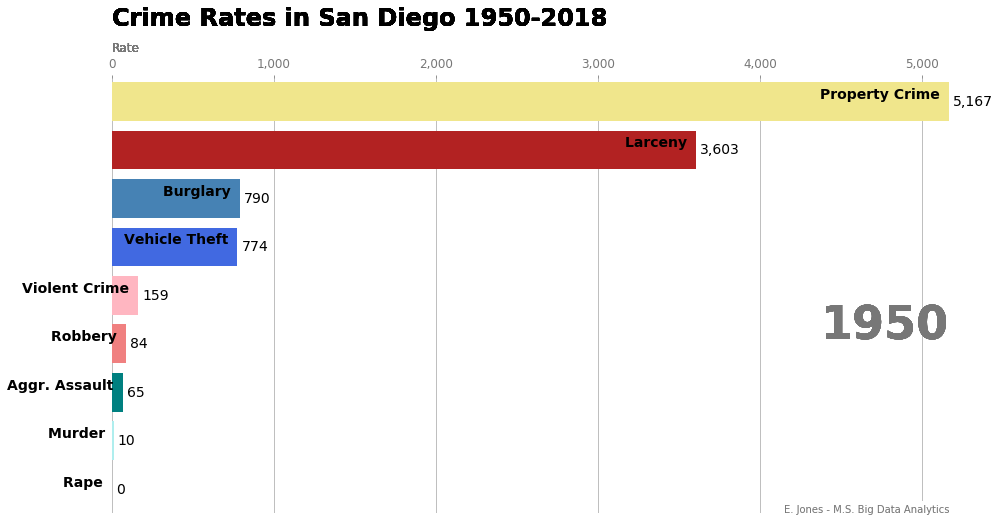

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1950, 2019), interval=400)
HTML(animator.to_jshtml()) 

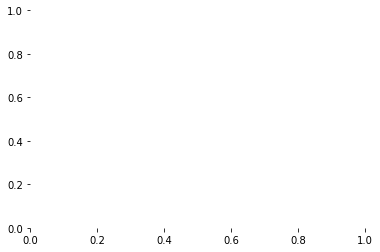

In [42]:
animator.save('/Users/elisabethjones/Desktop/Fall_2019/Python/finalprojcrime/4animation.gif', writer='imagemagick', fps=4)


# Thank you!
I'm excited to share this project with my co-workers at SANDAG.
Happy Holidays! 